# MachineLearning 
## Final Project - Shahid Beheshti University June 20, 2023
<br/>

+ **Pegah Givehchian**
https://github.com/pegah81
+ **Aria Hassanali Aragh** 
https://github.com/ARIASHA
<br/>

### Outline
- [Packages](#0)
- [Methods](#1)
#### Part One
- [Datasets](#2)
- [Loading Datasets](#2.1)
- [Cleaning Datasets](#2.2)
    - [MetaData](#2.2.1)
    - [Credits](#2.2.2)






<a name="0"></a>
##  **Packages** 

In [3]:
import pandas as pd
#parse values
import json
import ast
#Encoding
from sklearn.preprocessing import MultiLabelBinarizer
#plotting packages
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns
#IMDB
from imdb import IMDb
#Warning
import warnings
warnings.filterwarnings("ignore")

<a name="1"></a>
## Mehtods

In [4]:
# Making json values to dataframe
def json_to_DF(dataset,feature):
    dataset[feature] = dataset[feature].apply(ast.literal_eval)
    names_df = pd.DataFrame(dataset[feature].apply(lambda x: [item['name'] for item in x]))
    names_df = pd.DataFrame(names_df[feature].explode())
    name_counts = names_df[feature].value_counts()
    df_count = pd.DataFrame({'name': name_counts.index, 'frequency': name_counts.values})
    df_count.reset_index(drop=True, inplace=True)
    df_count.columns = ['name', 'frequency']
    return df_count

In [5]:
def onehot_json(dataset,feature,name):
    name_ids = []
    for index, row in dataset.iterrows():
        name_list = ast.literal_eval(row[feature])
        ids = [genre[name] for genre in name_list]
        name_ids.append(ids)

    # IDs as a new feature
    feature_name = name + '_col'
    dataset[feature_name] = name_ids
    df_encoded = pd.get_dummies(dataset[feature_name].apply(pd.Series).stack()).sum(level=0)
    # Concatenate the encoded genres with the original dataframe
    dataset = pd.concat([dataset, df_encoded], axis=1)
    return dataset
    

In [6]:
def barPlot(dataset,feature,color,y,n):
    freq = {}
    total_values = len(dataset)

    for element in dataset[feature]:
        freq[element] = freq.get(element, 0) + 1


    sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    elements = [item[0] for item in sorted_freq]
    frequencies = [item[1] for item in sorted_freq]
    elements = elements[::-1]
    frequencies = frequencies[::-1]
    
    plt.figure(figsize=(20, y))
    plt.barh(elements, frequencies, color=color)

    # Customize the plot
    plt.xlabel('Frequency')
    plt.ylabel('Elements')
    plt.title('Bar Plot with Frequency')
    
        # Sort the elements based on frequency
    sorted_elements = sorted(freq.keys(), key=lambda x: freq[x], reverse=True)

    # Print the top 3 elements, frequencies, and percentages
    for i in range(min(n, len(sorted_elements))):
        element = sorted_elements[i]
        frequency = freq[element]
        percentage = frequency / total_values * 100
        print(f"{element}: Frequency = {frequency}, Percentage = {percentage:.2f}%")
    # Display the plot
    plt.show()
    return sorted_elements
    
    

In [7]:
def featureAnalysis(feature,dataset):
    a = dataset.describe()
    b = a[feature].to_frame().T
    fig, ax = plt.subplots(2, 1, figsize=(20, 18))
    sns.histplot(x=dataset[feature], data=dataset, kde=True, element="step",ax=ax[0])
    sns.boxplot(data=dataset , x = feature ,ax=ax[1])
    return(b)

<a name="2"></a>
## Dataset
The Movies Dataset is a collection of data on 45,000 movies and contains information such as budget, revenue, release dates, languages, production countries, and companies for each movie. The dataset also includes ratings of 270,000 users for these movies. The data was obtained from The Movie Database (TMDb) API.<br/>
kaggle link :  https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

<a name="2.1"></a>
## Loading datasets

In [9]:
movies_metadata = pd.read_csv('dataset/movies_metadata.csv')
credits = pd.read_csv('dataset/credits.csv')
keywords = pd.read_csv('dataset/keywords.csv')
links = pd.read_csv('dataset/links.csv')
links_small = pd.read_csv('dataset/links_small.csv')
ratings = pd.read_csv('dataset/ratings.csv')
ratings_small = pd.read_csv('dataset/ratings_small.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/movies_metadata.csv'

# 

<a name="2.2"></a>
## Cleaning Datasets

<a name="2.2.1"></a>
### 1.Metadata

In [512]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [513]:
#Check Columns
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [514]:
#Drop Duplicated Values
movies_metadata=movies_metadata.drop_duplicates()
movies_metadata.shape

(45453, 24)

In [515]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45453 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45453 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45453 non-null  object 
 3   genres                 45453 non-null  object 
 4   homepage               7780 non-null   object 
 5   id                     45453 non-null  object 
 6   imdb_id                45436 non-null  object 
 7   original_language      45442 non-null  object 
 8   original_title         45453 non-null  object 
 9   overview               44499 non-null  object 
 10  popularity             45448 non-null  object 
 11  poster_path            45067 non-null  object 
 12  production_companies   45450 non-null  object 
 13  production_countries   45450 non-null  object 
 14  release_date           45366 non-null  object 
 15  re

**Drop useless features**

In [516]:
#This feature is useless and has lots of null values
movies_metadata.drop(['homepage'],inplace=True,axis =1)

In [517]:
movies_metadata['poster_path'].head(5)

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2    /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3    /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4    /e64sOI48hQXyru7naBFyssKFxVd.jpg
Name: poster_path, dtype: object

In [518]:
#This feature is also useless 
movies_metadata.drop(['poster_path'],inplace=True,axis =1)

**Save and drop text features**

In [519]:
selected_features = ['id', 'imdb_id', 'title' ,'original_title', 'overview','tagline']
textBased = movies_metadata[selected_features]
textBased

,id,imdb_id,title,original_title,overview,tagline
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...
...,...,...,...,...,...,...
45461,439050,tt6209470,Subdue,رگ خواب,Rising and falling between a man and woman.,Rising and falling between a man and woman
45462,111109,tt2028550,Century of Birthing,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,NaN
45463,67758,tt0303758,Betrayal,Betrayal,"When one of her hits goes wrong, a professiona...",A deadly game of wits.
45464,227506,tt0008536,Satan Triumphant,Satana likuyushchiy,"In a small town live two brothers, one a minis...",NaN


In [520]:
movies_metadata.drop(['original_title'], inplace = True , axis=1)
movies_metadata.drop(['title'], inplace = True , axis=1)
movies_metadata.drop(['overview'], inplace = True , axis=1)
movies_metadata.drop(['tagline'], inplace = True , axis=1)
movies_metadata

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,3.8,6.0
45464,False,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,False,0.0,0.0


In [521]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45453 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45453 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45453 non-null  object 
 3   genres                 45453 non-null  object 
 4   id                     45453 non-null  object 
 5   imdb_id                45436 non-null  object 
 6   original_language      45442 non-null  object 
 7   popularity             45448 non-null  object 
 8   production_companies   45450 non-null  object 
 9   production_countries   45450 non-null  object 
 10  release_date           45366 non-null  object 
 11  revenue                45447 non-null  float64
 12  runtime                45190 non-null  float64
 13  spoken_languages       45447 non-null  object 
 14  status                 45366 non-null  object 
 15  vi

# 

### Clean and encode other features

In [522]:
movies_metadataOrginal = movies_metadata.copy()

In [523]:
movies_metadata

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,False,3.8,6.0
45464,False,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,False,0.0,0.0


In [524]:
features = movies_metadata.columns

In [525]:
for feature in features:
    unique_count = movies_metadata[feature].nunique()
    print(f"Number of unique values for {feature}: {unique_count}")

Number of unique values for adult: 5
Number of unique values for belongs_to_collection: 1698
Number of unique values for budget: 1226
Number of unique values for genres: 4069
Number of unique values for id: 45436
Number of unique values for imdb_id: 45417
Number of unique values for original_language: 92
Number of unique values for popularity: 44176
Number of unique values for production_companies: 22708
Number of unique values for production_countries: 2393
Number of unique values for release_date: 17336
Number of unique values for revenue: 6863
Number of unique values for runtime: 353
Number of unique values for spoken_languages: 1931
Number of unique values for status: 6
Number of unique values for video: 2
Number of unique values for vote_average: 92
Number of unique values for vote_count: 1820


# 

**Video**

In [526]:
movies_metadata['video'].unique()

array([False, True, nan], dtype=object)

In [527]:
movies_metadata['video'].isnull().sum()

6

In [528]:
movies_metadata.dropna(subset=['video'], inplace=True)

In [529]:
encoded_df = pd.get_dummies(movies_metadata['video'], prefix='video')
movies_metadata = pd.concat([movies_metadata, encoded_df], axis=1)
movies_metadata.drop('video', axis=1, inplace=True)

In [530]:
movies_metadata

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,video_False,video_True
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,7.7,5415.0,1,0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,6.9,2413.0,1,0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.5,92.0,1,0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.1,34.0,1,0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,5.7,173.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,4.0,1.0,1,0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,9.0,3.0,1,0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,3.8,6.0,1,0
45464,False,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,0.0,0.0,1,0


# 

**Status**

In [531]:
movies_metadata['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [532]:
movies_metadata['status'].isnull().sum()

81

In [533]:
movies_metadata.dropna(subset=['status'], inplace=True)

In [534]:
encoded_df = pd.get_dummies(movies_metadata['status'], prefix='video')
movies_metadata = pd.concat([movies_metadata, encoded_df], axis=1)
movies_metadata.drop('status', axis=1, inplace=True)

In [535]:
movies_metadata

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,...,vote_average,vote_count,video_False,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,7.7,5415.0,1,0,0,0,0,0,1,0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.9,2413.0,1,0,0,0,0,0,1,0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.5,92.0,1,0,0,0,0,0,1,0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.1,34.0,1,0,0,0,0,0,1,0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,5.7,173.0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",...,4.0,1.0,1,0,0,0,0,0,1,0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",...,9.0,3.0,1,0,0,0,0,0,1,0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,3.8,6.0,1,0,0,0,0,0,1,0
45464,False,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",...,0.0,0.0,1,0,0,0,0,0,1,0


# 

**Adult**

In [536]:
movies_metadata['adult'].unique()

array(['False', 'True'], dtype=object)

In [537]:
filtered_df = movies_metadata[~((movies_metadata['adult'] == 'True') | (movies_metadata['adult'] == 'False'))]
filtered_df

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,...,vote_average,vote_count,video_False,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored


In [538]:
movies_metadata =  movies_metadata[(movies_metadata['adult'] == 'True') | (movies_metadata['adult'] == 'False')]

In [539]:
movies_metadata['adult'].unique()

array(['False', 'True'], dtype=object)

In [540]:
encoded_df = pd.get_dummies(movies_metadata['adult'], prefix='adult')
movies_metadata = pd.concat([movies_metadata, encoded_df], axis=1)
movies_metadata.drop('adult', axis=1, inplace=True)

In [541]:
movies_metadata

,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,...,video_False,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored,adult_False,adult_True
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,1,0,0,0,0,0,1,0,1,0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,1,0,0,0,0,0,1,0,1,0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,...,1,0,0,0,0,0,1,0,1,0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,...,1,0,0,0,0,0,1,0,1,0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,...,1,0,0,0,0,0,1,0,1,0
45464,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,...,1,0,0,0,0,0,1,0,1,0


In [542]:
movies_metadata

,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,...,video_False,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored,adult_False,adult_True
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,1,0,0,0,0,0,1,0,1,0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,1,0,0,0,0,0,1,0,1,0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,...,1,0,0,0,0,0,1,0,1,0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,...,1,0,0,0,0,0,1,0,1,0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,...,1,0,0,0,0,0,1,0,1,0
45464,NaN,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,...,1,0,0,0,0,0,1,0,1,0


# 

**Collections**

In [543]:
belongToCollection = movies_metadata[movies_metadata['belongs_to_collection'].isnull() == False]

In [544]:
listValues = belongToCollection['belongs_to_collection'].tolist()

In [545]:
len(listValues)

4488

In [546]:
#Single movies
movies_metadata['belongs_to_collection'].fillna('0', inplace=True)

In [547]:
belongToCollection

,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,...,video_False,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored,adult_False,adult_True
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,1,0,0,0,0,0,1,0,1,0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,1,0,0,0,0,0,1,0,1,0
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,...,1,0,0,0,0,0,1,0,1,0
12,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,tt0112453,en,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",24568,tt0061680,en,1.114848,"[{'name': 'The Rank Organisation', 'id': 364},...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1967-09-01,...,1,0,0,0,0,0,1,0,1,0
45358,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",19307,tt0064133,en,4.103723,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1969-05-29,...,1,0,0,0,0,0,1,0,1,0
45369,"{'id': 37261, 'name': 'The Carry On Collection...",0,"[{'id': 35, 'name': 'Comedy'}]",21251,tt0074286,en,0.846154,"[{'name': 'The Rank Organisation', 'id': 364}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1976-10-01,...,1,0,0,0,0,0,1,0,1,0
45371,"{'id': 477208, 'name': 'DC Super Hero Girls Co...",0,"[{'id': 16, 'name': 'Animation'}]",460135,tt7158814,en,8.413734,"[{'name': 'Warner Bros. Animation', 'id': 2785}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-08-30,...,1,0,0,0,0,0,1,0,1,0


In [548]:
movies_metadata['belongs_to_collection'] = movies_metadata['belongs_to_collection'].apply(lambda x: '[' + x + ']')

In [549]:
movies_metadata.loc[0]['belongs_to_collection']

"[{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}]"

In [550]:
movies_metadata['Single'] = movies_metadata['belongs_to_collection'].apply(lambda x: 1 if '[0]' in x else 0)

In [551]:
movies_metadata.drop(['belongs_to_collection'], inplace = True , axis=1)

In [552]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,video_True,video_Canceled,video_In Production,video_Planned,video_Post Production,video_Released,video_Rumored,adult_False,adult_True,Single
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,1,0,1,0,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,1,0,1,0,1
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,1,0,1,0,0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,1,0,1,0,1
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,1,0,1,0,1
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,1,0,1,0,1
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,...,0,0,0,0,0,1,0,1,0,1
45464,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,...,0,0,0,0,0,1,0,1,0,1


# 

**Genres**

In [553]:
genres_df = json_to_DF(movies_metadata , 'genres' )
genres_df

,name,frequency
0,Drama,20235
1,Comedy,13169
2,Thriller,7616
3,Romance,6726
4,Action,6585
5,Horror,4668
6,Crime,4304
7,Documentary,3916
8,Adventure,3492
9,Science Fiction,3040


In [554]:
feature_list = movies_metadata['genres'].tolist()

In [555]:
movies_metadata = onehot_json(movies_metadata,'genres','name')

ValueError: malformed node or string: [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]

In [ ]:
movies_metadata = movies_metadata.dropna(subset=['History'])
movies_metadata

# 

**Original_language**

In [ ]:
movies_metadata['original_language'].unique()

In [ ]:
movies_metadata['original_language'].isnull().sum()

In [ ]:
movies_metadata.dropna(subset=['original_language'], inplace=True)

In [ ]:
sorted_frq = barPlot(movies_metadata,'original_language','blue',20,40)

In [ ]:
allowed_values = sorted_frq[:30]

In [ ]:
movies_metadata.loc[~movies_metadata['original_language'].isin(allowed_values), 'original_language'] = 'others'

In [ ]:
df_encoded = pd.get_dummies(movies_metadata['original_language'], prefix='original_language')
movies_metadata = pd.concat([movies_metadata, df_encoded], axis=1)
movies_metadata

In [ ]:
movies_metadata.columns

# 

**Production_companies**

In [ ]:
movies_metadata

In [ ]:
movies_metadata = movies_metadata[movies_metadata['production_countries'] != '[]'] 

In [ ]:
feature_list = movies_metadata['production_companies'].tolist()

In [ ]:
movies_metadata['production_companies'].isnull().sum()

In [ ]:
movies_metadata['production_companies']

In [ ]:
movies_metadata['production_companies'] = movies_metadata['production_companies'].apply(ast.literal_eval)
names_df = pd.DataFrame(movies_metadata['production_companies'].apply(lambda x: [item['name'] for item in x]))
names_df = pd.DataFrame(names_df['production_companies'].explode())
name_counts = names_df['production_companies'].value_counts()

In [ ]:
name_counts

In [ ]:
df = pd.DataFrame({'name': name_counts.index, 'frequency': name_counts.values})
df.reset_index(drop=True, inplace=True)
df.columns = ['name', 'frequency']

In [ ]:
df

In [ ]:
df['frequency'].describe()

In [ ]:
featureAnalysis('frequency',df)

In [ ]:
df[df['frequency'] > 49]

In [ ]:
df[df['frequency'] > 49]['frequency'].sum()

In [ ]:
target_companies  = df[df['frequency'] > 49]['name'].tolist()

In [ ]:
df[df['frequency'] > 990]

In [ ]:
company1  = df[df['frequency'] > 990]['name'].tolist()

In [ ]:
df[(df['frequency'] > 400) & (df['frequency'] < 900)]

In [ ]:
company2  = df[(df['frequency'] > 400) & (df['frequency'] < 900)]['name'].tolist()

In [ ]:
df[(df['frequency'] > 100) & (df['frequency'] < 430)]

In [ ]:
company3  = df[(df['frequency'] > 100) & (df['frequency'] < 431 )]['name'].tolist()

In [ ]:
df[(df['frequency'] > 50) & (df['frequency'] < 101)]

In [ ]:
company4  = df[(df['frequency'] > 50) & (df['frequency'] < 101 )]['name'].tolist()

In [ ]:
df[(df['frequency'] > 20) & (df['frequency'] < 51)]

In [ ]:
company5  = df[(df['frequency'] > 20) & (df['frequency'] < 51 )]['name'].tolist()

In [ ]:
df[(df['frequency'] > 10) & (df['frequency'] < 21)]

In [ ]:
company6 = df[(df['frequency'] > 10) & (df['frequency'] < 21 )]['name'].tolist()

In [ ]:
df[(df['frequency'] > 5) & (df['frequency'] < 11)]

In [ ]:
company7  = df[(df['frequency'] > 5) & (df['frequency'] < 11 )]['name'].tolist()

In [ ]:
df[(df['frequency'] > 2) & (df['frequency'] < 6)]

In [ ]:
company8  = df[(df['frequency'] > 2) & (df['frequency'] < 6 )]['name'].tolist()

In [ ]:
df[df['frequency'] ==2]

In [ ]:
company9 = df[df['frequency'] ==2]['name'].tolist()

In [ ]:
df[df['frequency'] ==1 ]

In [ ]:
company10 = df[df['frequency'] ==1]['name'].tolist()

In [ ]:
movies_metadata['production_companies'] = movies_metadata['production_companies'].astype(str)
for company in target_companies:
    movies_metadata[company] = movies_metadata['production_companies'].apply(lambda x: 1 if company in x else 0)
movies_metadata['others_companies'] = movies_metadata[target_companies].sum(axis=1)
movies_metadata['others_companies'] = movies_metadata['others_companies'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
movies_metadata

In [ ]:
for i in range(1, 11):
    company_list = eval(f'company{i}')
    feature_name = f'company_{i}'
    movies_metadata[feature_name] = movies_metadata['production_companies'].apply(lambda x: 1 if any(company in x for company in company_list) else 0)

In [ ]:
movies_metadata

# 

**production_countries**

In [ ]:
movies_metadata = movies_metadata[movies_metadata['production_countries'] != '[]']

In [ ]:
movies_metadata['production_countries'].isnull().sum()

In [ ]:
movies_metadata['production_countries']

In [ ]:
movies_metadata['production_countries'] = movies_metadata['production_countries'].astype(str)

# Function to convert the value to a list if it's a dictionary, otherwise evaluate it as a list
def convert_value(value):
    try:
        # Try evaluating the value as a list
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        # If it's not a valid list, assume it's a dictionary and return it as a list of one item
        return [ast.literal_eval(value)]

# Apply the conversion function to each element in the 'production_countries' column
movies_metadata['production_countries'] = movies_metadata['production_countries'].apply(convert_value)

# Continue with the rest of your code
names_df = pd.DataFrame(movies_metadata['production_countries'].apply(lambda x: [item['name'] for item in x]))
names_df = pd.DataFrame(names_df['production_countries'].explode())
name_counts = names_df['production_countries'].value_counts()

In [ ]:
name_counts

In [ ]:
df = pd.DataFrame({'name': name_counts.index, 'frequency': name_counts.values})
df.reset_index(drop=True, inplace=True)
df.columns = ['name', 'frequency']

In [556]:
df

,name,frequency
0,United States of America,20907
1,United Kingdom,4040
2,France,3845
3,Germany,2211
4,Italy,2068
...,...,...
152,Madagascar,1
153,United States Minor Outlying Islands,1
154,Cayman Islands,1
155,Martinique,1


,count,mean,std,min,25%,50%,75%,max
frequency,157.0,307.949045,1741.336573,1.0,3.0,10.0,104.0,20907.0


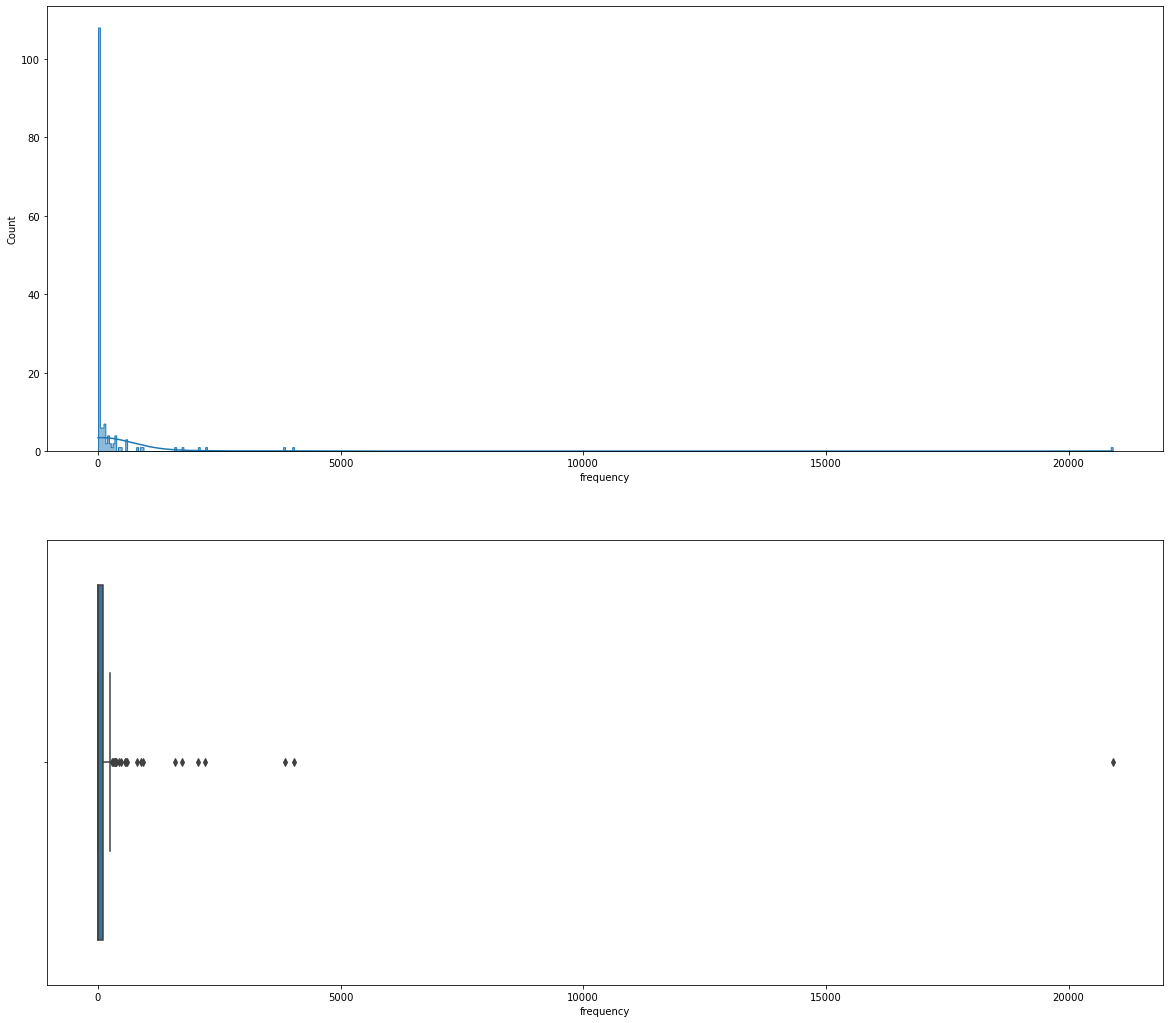

In [557]:
featureAnalysis('frequency',df)

In [558]:
df[df['frequency'] > 10]

,name,frequency
0,United States of America,20907
1,United Kingdom,4040
2,France,3845
3,Germany,2211
4,Italy,2068
...,...,...
71,Senegal,14
72,Malaysia,12
73,Puerto Rico,12
74,Algeria,12


In [559]:
target_countries = df[df['frequency'] > 10]['name'].tolist()

In [560]:
movies_metadata['production_countries'] = movies_metadata['production_countries'].astype(str)
for country in target_countries:
    movies_metadata[country] = movies_metadata['production_countries'].apply(lambda x: 1 if country in x else 0)

movies_metadata['others_country'] = movies_metadata[target_countries].sum(axis=1)
movies_metadata['others_country'] = movies_metadata['others_country'].apply(lambda x: 1 if x == 0 else 0)

In [561]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,Pakistan,Macedonia,Lebanon,Qatar,Senegal,Malaysia,Puerto Rico,Algeria,Palestinian Territory,others_country
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,0,0,0,0,0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,0,0,0,0,0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,0,0,0,0,0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,0,0,0,0,0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,...,0,0,0,0,0,0,0,0,0,0
45464,0,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,...,0,0,0,0,0,0,0,0,0,0


In [562]:
movies_metadata.columns.tolist()

['budget',
 'genres',
 'id',
 'imdb_id',
 'original_language',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'vote_average',
 'vote_count',
 'video_False',
 'video_True',
 'video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored',
 'adult_False',
 'adult_True',
 'Single',
 'United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Italy',
 'Canada',
 'Japan',
 'Spain',
 'Russia',
 'India',
 'Hong Kong',
 'Sweden',
 'Australia',
 'South Korea',
 'Belgium',
 'Denmark',
 'Netherlands',
 'China',
 'Finland',
 'Mexico',
 'Poland',
 'Brazil',
 'Switzerland',
 'Argentina',
 'Ireland',
 'Czech Republic',
 'Norway',
 'Austria',
 'Hungary',
 'Greece',
 'Turkey',
 'Israel',
 'Romania',
 'South Africa',
 'New Zealand',
 'Taiwan',
 'Portugal',
 'Thailand',
 'Serbia',
 'Iran',
 'Luxembourg',
 'Philippines',
 'Croatia',
 'Iceland',
 'Chile',
 '

# 

**Spoken_languages**

In [563]:
movies_metadata = movies_metadata[movies_metadata['spoken_languages'] != '[]']

In [564]:
movies_metadata['spoken_languages'] = movies_metadata['spoken_languages'].apply(ast.literal_eval)
names_df = pd.DataFrame(movies_metadata['spoken_languages'].apply(lambda x: [item['name'] for item in x]))
names_df = pd.DataFrame(names_df['spoken_languages'].explode())
name_counts = names_df['spoken_languages'].value_counts()

In [565]:
name_counts

English            28718
Français            4193
Deutsch             2620
Español             2411
Italiano            2366
                   ...  
Bokmål                 3
беларуская мова        2
Fulfulde               2
ozbek                  2
Hausa                  1
Name: spoken_languages, Length: 75, dtype: int64

In [566]:
df_count = pd.DataFrame({'name': name_counts.index, 'frequency': name_counts.values})
df_count.reset_index(drop=True, inplace=True)
df_count.columns = ['name', 'frequency']

In [567]:
df_count[df_count['frequency'] > 10 ]

,name,frequency
0,English,28718
1,Français,4193
2,Deutsch,2620
3,Español,2411
4,Italiano,2366
5,日本語,1756
6,Pусский,1561
7,普通话,788
8,हिन्दी,706
9,Português,590


In [568]:
targetLanguage = df_count[df_count['frequency'] > 10 ]['name'].tolist()

In [570]:
movies_metadata['spoken_languages'] = movies_metadata['spoken_languages'].astype(str)
for language in targetLanguage:
    movies_metadata[language] = movies_metadata['spoken_languages'].apply(lambda x: 1 if company in x else 0)
movies_metadata['others_spoken_languages'] = movies_metadata[targetLanguage].sum(axis=1)
movies_metadata['others_spoken_languages'] = movies_metadata['others_spoken_languages'].apply(lambda x: 1 if x == 0 else 0)

In [571]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,Slovenščina,Latviešu,Gaeilge,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,қазақ,others_spoken_languages
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,0,0,0,0,1
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,0,0,0,0,1
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,0,0,0,0,1
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,0,0,0,0,1
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,...,0,0,0,0,0,0,0,0,0,1
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,0,0,0,0,1
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,0,0,0,0,1
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,...,0,0,0,0,0,0,0,0,0,1


In [572]:
 movies_metadata.drop([''],inplace=True,axis =1)

In [573]:
movies_metadata

,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,Slovenščina,Latviešu,Gaeilge,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,қазақ,others_spoken_languages
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,0,0,0,0,0,0,0,0,0,1
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,0,0,0,0,0,0,0,0,0,1
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,...,0,0,0,0,0,0,0,0,0,1
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,...,0,0,0,0,0,0,0,0,0,1
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,5.683753,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,...,0,0,0,0,0,0,0,0,0,1
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,...,0,0,0,0,0,0,0,0,0,1
45462,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,...,0,0,0,0,0,0,0,0,0,1
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,...,0,0,0,0,0,0,0,0,0,1


In [574]:
movies_metadata.columns.tolist()

['budget',
 'genres',
 'id',
 'imdb_id',
 'original_language',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'vote_average',
 'vote_count',
 'video_False',
 'video_True',
 'video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored',
 'adult_False',
 'adult_True',
 'Single',
 'United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Italy',
 'Canada',
 'Japan',
 'Spain',
 'Russia',
 'India',
 'Hong Kong',
 'Sweden',
 'Australia',
 'South Korea',
 'Belgium',
 'Denmark',
 'Netherlands',
 'China',
 'Finland',
 'Mexico',
 'Poland',
 'Brazil',
 'Switzerland',
 'Argentina',
 'Ireland',
 'Czech Republic',
 'Norway',
 'Austria',
 'Hungary',
 'Greece',
 'Turkey',
 'Israel',
 'Romania',
 'South Africa',
 'New Zealand',
 'Taiwan',
 'Portugal',
 'Thailand',
 'Serbia',
 'Iran',
 'Luxembourg',
 'Philippines',
 'Croatia',
 'Iceland',
 'Chile',
 '

In [575]:
orginal = movies_metadata.copy()

In [576]:
features_to_remove = ['genres', 'original_language', 'production_companies', 'production_countries','spoken_languages' ]
movies_metadata = movies_metadata.drop(features_to_remove, axis=1)
movies_metadata

,budget,id,imdb_id,popularity,release_date,revenue,runtime,vote_average,vote_count,video_False,...,Slovenščina,Latviešu,Gaeilge,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,қазақ,others_spoken_languages
0,30000000,862,tt0114709,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,1,...,0,0,0,0,0,0,0,0,0,1
1,65000000,8844,tt0113497,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,15602,tt0113228,11.7129,1995-12-22,0.0,101.0,6.5,92.0,1,...,0,0,0,0,0,0,0,0,0,1
3,16000000,31357,tt0114885,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,11862,tt0113041,8.387519,1995-02-10,76578911.0,106.0,5.7,173.0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0,30840,tt0102797,5.683753,1991-05-13,0.0,104.0,5.7,26.0,1,...,0,0,0,0,0,0,0,0,0,1
45461,0,439050,tt6209470,0.072051,NaN,0.0,90.0,4.0,1.0,1,...,0,0,0,0,0,0,0,0,0,1
45462,0,111109,tt2028550,0.178241,2011-11-17,0.0,360.0,9.0,3.0,1,...,0,0,0,0,0,0,0,0,0,1
45463,0,67758,tt0303758,0.903007,2003-08-01,0.0,90.0,3.8,6.0,1,...,0,0,0,0,0,0,0,0,0,1


In [581]:
movies_metadata.columns.tolist()

['budget',
 'id',
 'imdb_id',
 'popularity',
 'release_date',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'video_False',
 'video_True',
 'video_Canceled',
 'video_In Production',
 'video_Planned',
 'video_Post Production',
 'video_Released',
 'video_Rumored',
 'adult_False',
 'adult_True',
 'Single',
 'United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Italy',
 'Canada',
 'Japan',
 'Spain',
 'Russia',
 'India',
 'Hong Kong',
 'Sweden',
 'Australia',
 'South Korea',
 'Belgium',
 'Denmark',
 'Netherlands',
 'China',
 'Finland',
 'Mexico',
 'Poland',
 'Brazil',
 'Switzerland',
 'Argentina',
 'Ireland',
 'Czech Republic',
 'Norway',
 'Austria',
 'Hungary',
 'Greece',
 'Turkey',
 'Israel',
 'Romania',
 'South Africa',
 'New Zealand',
 'Taiwan',
 'Portugal',
 'Thailand',
 'Serbia',
 'Iran',
 'Luxembourg',
 'Philippines',
 'Croatia',
 'Iceland',
 'Chile',
 'Bulgaria',
 'Estonia',
 'Ukraine',
 'Singapore',
 'Bosnia and Herzegovina',
 'Lithuania',
 'Colombia',
 

In [580]:
movies_metadata.isnull().sum().tolist()

[0,
 0,
 10,
 0,
 23,
 0,
 145,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [582]:
filterd_id = movies_metadata['id'].tolist()

In [609]:
filterd_imdb_id = movies_metadata['imdb_id'].tolist()

In [583]:
filterd_id_int = [int(value) for value in filterd_id]

# 

<a name="2.2.2"></a>
### 2.Keywords

In [10]:
keyword = pd.read_csv("../dataset/keywords_raw.csv")

In [12]:
keyword

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [584]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [585]:
keywords = keywords[keywords['id'].isin(filterd_id_int)]

In [586]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46413,30840,[]
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]


In [588]:
#Drop Duplicated Values
keywords=keywords.drop_duplicates()
keywords.shape

(41563, 2)

In [589]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46413,30840,[]
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]


In [590]:
keywords.loc[0]['keywords']

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [591]:
count = json_to_DF(keywords,'keywords')

In [592]:
count

,name,frequency
0,woman director,2726
1,independent film,1807
2,murder,1274
3,based on novel,812
4,musical,699
...,...,...
19734,sonic youth,1
19735,western roman empire,1
19736,bickering couple,1
19737,held against will,1


,count,mean,std,min,25%,50%,75%,max
frequency,19739.0,7.773494,35.490804,1.0,1.0,2.0,5.0,2726.0


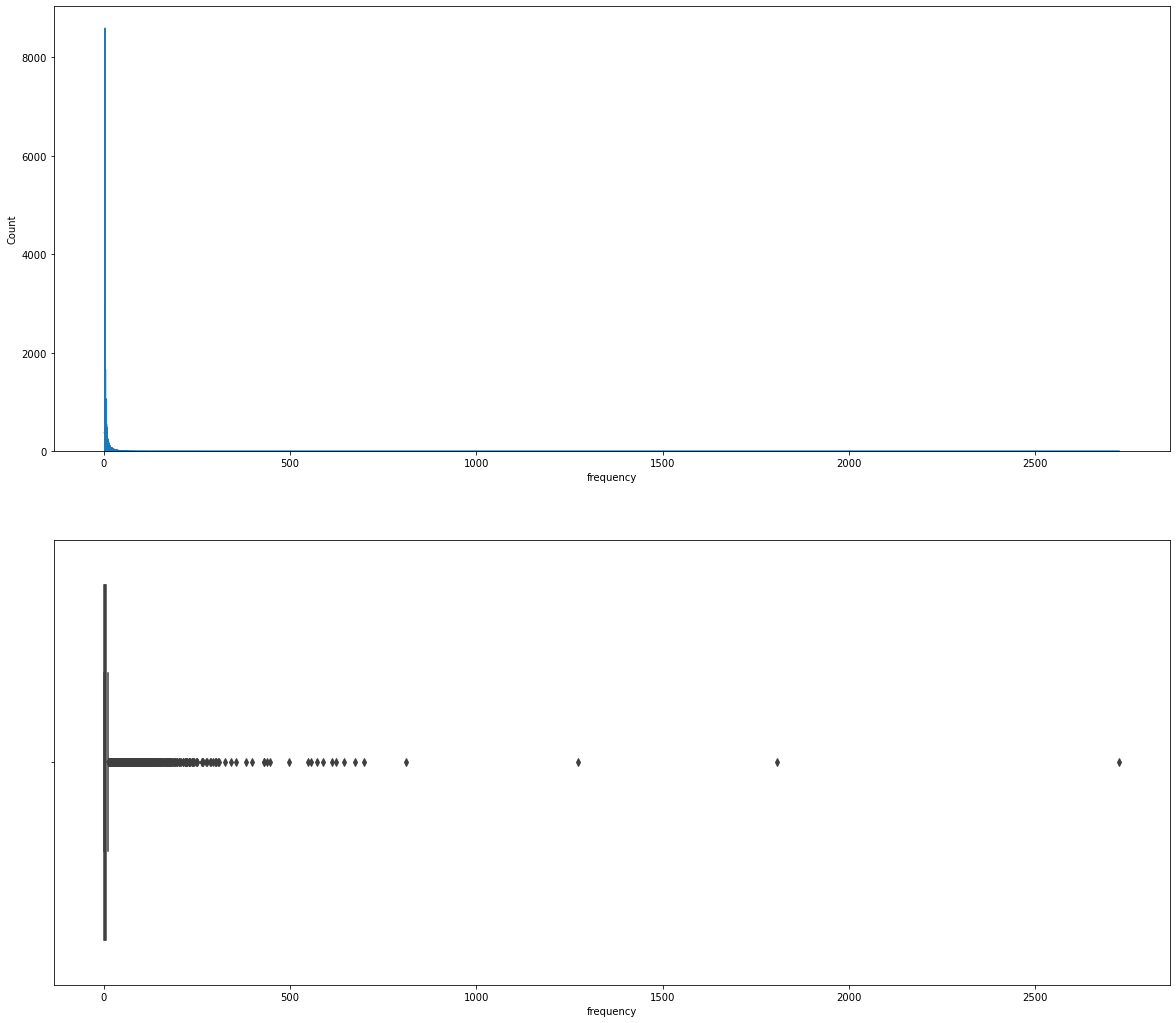

In [593]:
featureAnalysis('frequency',count)

In [602]:
count[count['frequency']>10]

,name,frequency
0,woman director,2726
1,independent film,1807
2,murder,1274
3,based on novel,812
4,musical,699
...,...,...
2607,loan shark,11
2608,fired from the job,11
2609,cabin in the woods,11
2610,hot air balloon,11


# 

<a name="2.2.2"></a>
### 3.Links

In [603]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [606]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [611]:
len(filterd_imdb_id)


41580

In [614]:
filterd_imdb_id

['tt0114709',
 'tt0113497',
 'tt0113228',
 'tt0114885',
 'tt0113041',
 'tt0113277',
 'tt0114319',
 'tt0112302',
 'tt0114576',
 'tt0113189',
 'tt0112346',
 'tt0112896',
 'tt0112453',
 'tt0113987',
 'tt0112760',
 'tt0112641',
 'tt0114388',
 'tt0113101',
 'tt0112281',
 'tt0113845',
 'tt0113161',
 'tt0112722',
 'tt0112401',
 'tt0114168',
 'tt0113627',
 'tt0114057',
 'tt0114011',
 'tt0114117',
 'tt0112682',
 'tt0115012',
 'tt0112792',
 'tt0114746',
 'tt0114952',
 'tt0112431',
 'tt0112637',
 'tt0112818',
 'tt0112286',
 'tt0113442',
 'tt0112697',
 'tt0112749',
 'tt0114279',
 'tt0112819',
 'tt0114272',
 'tt0113855',
 'tt0114681',
 'tt0113347',
 'tt0114369',
 'tt0114148',
 'tt0114916',
 'tt0114814',
 'tt0113819',
 'tt0110299',
 'tt0112499',
 'tt0113158',
 'tt0113541',
 'tt0113321',
 'tt0110877',
 'tt0112714',
 'tt0113419',
 'tt0116260',
 'tt0113862',
 'tt0116126',
 'tt0118002',
 'tt0115683',
 'tt0116839',
 'tt0114753',
 'tt0113149',
 'tt0113118',
 'tt0116367',
 'tt0113010',
 'tt0113537',
 'tt01

In [626]:
result = [element for element in filterd_imdb_id if isinstance(element, str) and element.startswith('tt8')]
len(result)

0

tt8

In [627]:
pip install IMDbPY


Note: you may need to restart the kernel to use updated packages.


In [634]:
import imdb

# Create an instance of the IMDb class
ia = imdb.IMDb()

# IMDb ID of the movie you want to retrieve information for
imdb_id = '0113107'

# Fetch the movie information using the IMDb ID
movie = ia.get_movie(imdb_id)

# Print the movie information
print("Title:", movie['title'])
print("Year:", movie['year'])
print("Genres:", movie['genres'])
print("Plot:", movie['plot'][0])


Title: Frankie Starlight
Year: 1995
Genres: ['Drama', 'Romance', 'War']
Plot: A writer with dwarfism shares the story of his unconventional, though not altogether bad, upbringing as his mother struggled to raise him in the mid-20th century with help from a surrogate father.


In [635]:
print(movie)

Frankie Starlight


In [636]:
if 'budget' in movie:
    print("Budget:", movie['budget'])

# Retrieve the production company information
if 'production companies' in movie:
    production_companies = movie['production companies']
    print("Production Companies:")
    for company in production_companies:
        print(company)

# Retrieve the country information
if 'countries' in movie:
    countries = movie['countries']
    print("Countries:")
    for country in countries:
        print(country)

Production Companies:
Bord Scannán na hÉireann / The Irish Film Board
Canal+
Channel Four Films
Ferndale Films
Fine Line Features
Pandora Cinema
RIMB
Raidió Teilifís Éireann
Someone
Countries:
Ireland
United Kingdom
France
United States


### 3.Casts

In [11]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [20]:
credits.loc[8]['crew']

"[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'department': 'Directing', 'gender': 2, 'id': 37710, 'job': 'Director', 'name': 'Peter Hyams', 'profile_path': '/dAuDsStGGlUESaaAYQf0GCE2JWo.jpg'}, {'credit_id': '52fe44dbc3a36847f80ae0f7', 'department': 'Writing', 'gender': 1, 'id': 53300, 'job': 'Screenplay', 'name': 'Karen Elise Baldwin', 'profile_path': None}, {'credit_id': '52fe44dbc3a36847f80ae103', 'department': 'Writing', 'gender': 2, 'id': 56953, 'job': 'Screenplay', 'name': 'Gene Quintano', 'profile_path': None}, {'credit_id': '52fe44dbc3a36847f80ae109', 'department': 'Production', 'gender': 2, 'id': 56032, 'job': 'Producer', 'name': 'Moshe Diamant', 'profile_path': None}, {'credit_id': '52fe44dbc3a36847f80ae10f', 'department': 'Production', 'gender': 0, 'id': 56954, 'job': 'Producer', 'name': 'Anders P. Jensen', 'profile_path': None}, {'credit_id': '52fe44dbc3a36847f80ae115', 'department': 'Production', 'gender': 2, 'id': 53299, 'job': 'Producer', 'name': 'Howard Baldwin', 'profile

In [21]:
ia = IMDb()

# List of IMDb IDs
imdb_ids = ['tt0111161', 'tt0468569', 'tt1375666']  # Example IMDb IDs

# Initialize empty lists to store the extracted information
titles = []
plots = []
directors = []
writers = []
casts = []

# Iterate over each IMDb ID
for imdb_id in imdb_ids:
    # Retrieve movie information using IMDbPY
    movie = ia.get_movie(imdb_id)
    # Extract the desired features
    title = movie.get('title', '')
    plot = movie.get('plot', [''])[0]  # Assuming the first plot summary is sufficient
    director_list = movie.get('director', [])
    writer_list = movie.get('writer', [])
    cast_list = movie.get('cast', [])
    # Convert director, writer, and cast lists to strings for easier representation
    director_str = ', '.join([d['name'] for d in director_list])
    writer_str = ', '.join([w['name'] for w in writer_list])
    cast_str = ', '.join([c['name'] for c in cast_list])
    # Append the extracted information to the respective lists
    titles.append(title)
    plots.append(plot)
    directors.append(director_str)
    writers.append(writer_str)
    casts.append(cast_str)

# Create a dataframe using the extracted information
data = {
    'IMDb ID': imdb_ids,
    'Title': titles,
    'Plot': plots,
    'Directors': directors,
    'Writers': writers,
    'Cast': casts
}
df = pd.DataFrame(data)

# Print the dataframe
print(df)


NameError: name 'Writing' is not defined